In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("heart_2020_cleaned.csv")

# EDA


## basic information on dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


## analysing different numerical columns

In [8]:
pd.DataFrame(df.PhysicalHealth.value_counts()).sort_index()

,PhysicalHealth
0.0,226589
1.0,10489
2.0,14880
3.0,8617
4.0,4468
5.0,7606
6.0,1270
7.0,4629
8.0,924
9.0,180


In [9]:
pd.DataFrame(df.MentalHealth.value_counts()).sort_index()

,MentalHealth
0.0,205401
1.0,9291
2.0,16495
3.0,10466
4.0,5379
5.0,14149
6.0,1510
7.0,5528
8.0,1094
9.0,203


In [10]:
pd.DataFrame(df.SleepTime.value_counts()).sort_index()

,SleepTime
1.0,551
2.0,788
3.0,1992
4.0,7750
5.0,19184
6.0,66721
7.0,97751
8.0,97602
9.0,16041
10.0,7796


## analysing different Categorical columns

In [11]:
cat_cols = df.select_dtypes(exclude= np.number).columns

In [12]:
for i in cat_cols:
    print(i)
    print(df[i].value_counts())

HeartDisease
No     292422
Yes     27373
Name: HeartDisease, dtype: int64
Smoking
No     187887
Yes    131908
Name: Smoking, dtype: int64
AlcoholDrinking
No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64
Stroke
No     307726
Yes     12069
Name: Stroke, dtype: int64
DiffWalking
No     275385
Yes     44410
Name: DiffWalking, dtype: int64
Sex
Female    167805
Male      151990
Name: Sex, dtype: int64
AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64
Race
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype:

## Relationship of different columns with Heart Disease

In [13]:
df_yes = df[df.HeartDisease == 'Yes']
len(df_yes)

27373

c:\Users\Pj158\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


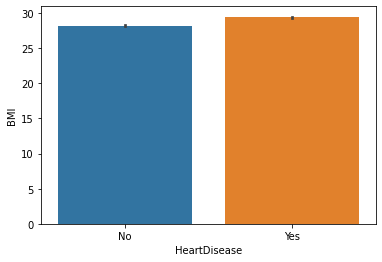

In [14]:
# HeartDisease and BMI
sns.barplot(df.HeartDisease, df.BMI)
plt.show()


#### from the following graph we can see that people with higher BMI have a slightly higher chance of getting heart disease

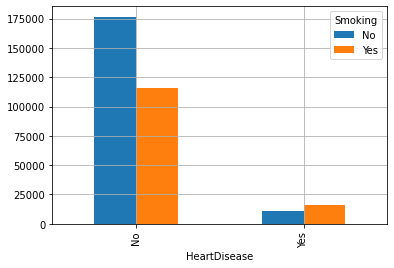

In [15]:
# HeartDisease and Smoking
pd.crosstab(df.HeartDisease, df.Smoking).plot(kind = 'bar')
plt.grid(True)
plt.show()

In [16]:
df.HeartDisease.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [17]:
pd.crosstab(df.HeartDisease, df.Smoking)

Smoking,No,Yes
HeartDisease,,
No,176551,115871
Yes,11336,16037


####  Inference - from the following graph we can see that people who smoke have a higher chance of getting heart disease

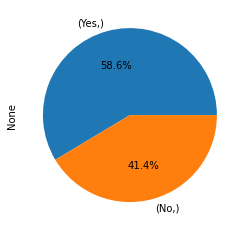

In [18]:
# checking only for Heart Disease Yes 
pd.DataFrame(df[df.HeartDisease == 'Yes']['Smoking']).value_counts().plot(kind = 'pie', autopct = '%.1f%%')
plt.show()

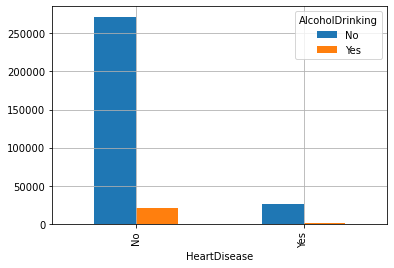

In [19]:
# HeartDisease and AlcoholDrinking
pd.crosstab(df.HeartDisease, df.AlcoholDrinking).plot(kind= 'bar')
plt.grid(True)
plt.show()

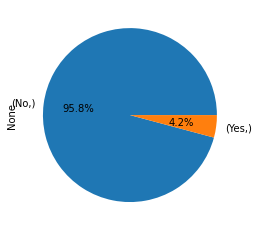

In [20]:
pd.DataFrame(df[df.HeartDisease == 'Yes']['AlcoholDrinking']).value_counts().plot(kind = 'pie', autopct = '%.1f%%')
plt.show()

#### no relationship is found between drinking alcohol and heart disease

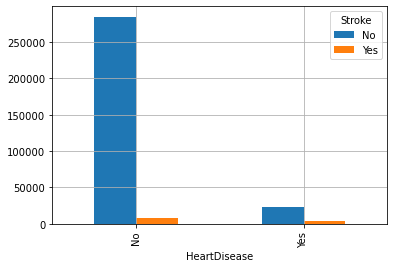

In [21]:
# HeartDisease and Stroke
pd.crosstab(df.HeartDisease, df.Stroke).plot(kind= 'bar')
plt.grid(True)
plt.show()

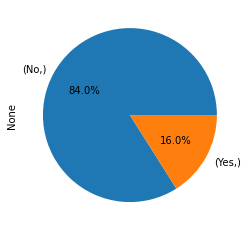

In [22]:
pd.DataFrame(df[df.HeartDisease == 'Yes']['Stroke']).value_counts().plot(kind = 'pie', autopct = '%.1f%%')
plt.show()

####  Inference - from the following graph we can see that people who had stroke have a lesser chance of getting heart disease

In [23]:
#heart Disease vs Physical Health
df['PhysicalHealth'] = df['PhysicalHealth'].astype('object')

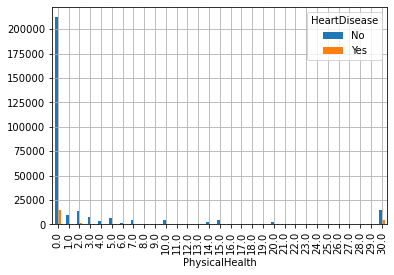

In [24]:
pd.crosstab(df.PhysicalHealth, df.HeartDisease).plot(kind= 'bar')
plt.grid(True)
plt.show()

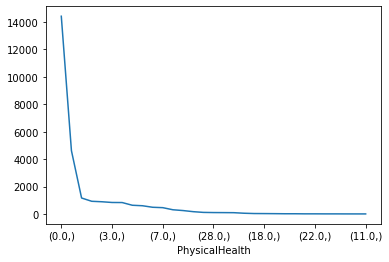

In [25]:
pd.DataFrame(df[df.HeartDisease == 'Yes']['PhysicalHealth']).value_counts().plot(kind = 'line')
plt.show()

In [26]:
#heart Disease vs Mental Health
df.MentalHealth = df['MentalHealth'].astype('object')

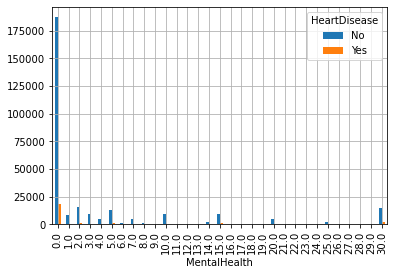

In [27]:
# HeartDisease and Mental Health
pd.crosstab(df.MentalHealth, df.HeartDisease).plot(kind= 'bar')
plt.grid(True)
plt.show()

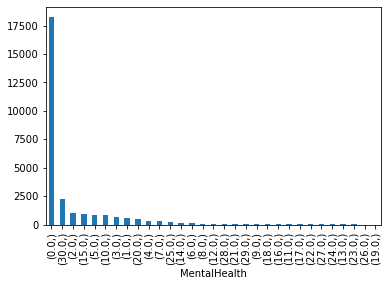

In [28]:
pd.DataFrame(df[df.HeartDisease == 'Yes']['MentalHealth']).value_counts().plot(kind = 'bar')
plt.show()

<AxesSubplot:xlabel='HeartDisease'>

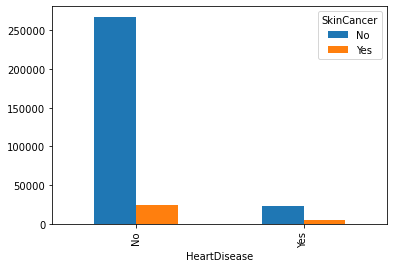

In [29]:
pd.crosstab(df.HeartDisease, df.SkinCancer).plot(kind = 'bar')

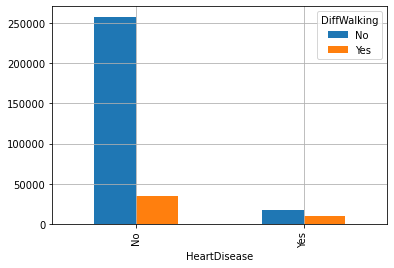

In [30]:
#heart Disease vs DiffWalking
pd.crosstab(df.HeartDisease, df.DiffWalking).plot(kind= 'bar')
plt.grid(True)
plt.show()

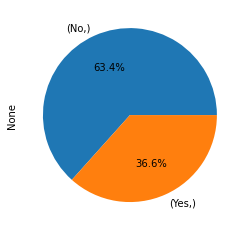

In [31]:
pd.DataFrame(df[df.HeartDisease == 'Yes']['DiffWalking']).value_counts().plot(kind = 'pie', autopct = '%.1f%%')
plt.show()

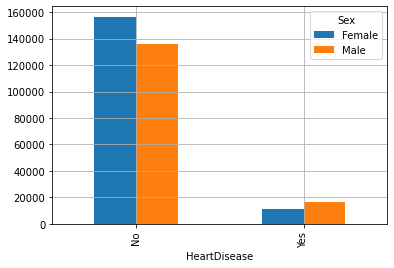

In [32]:
# HeartDisease and Sex
pd.crosstab(df.HeartDisease, df.Sex).plot(kind= 'bar')
plt.grid(True)
plt.show()

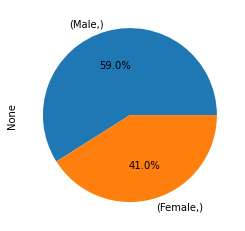

In [33]:
pd.DataFrame(df[df.HeartDisease == 'Yes']['Sex']).value_counts().plot(kind = 'pie', autopct = '%.1f%%')
plt.show()

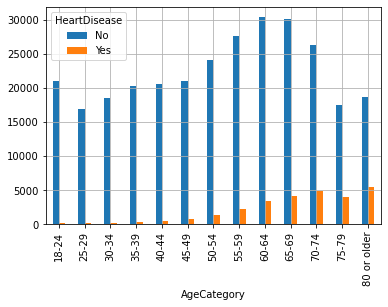

In [34]:
#heartDisease vs AgeCategory
pd.crosstab(df.AgeCategory, df.HeartDisease).plot(kind= 'bar')
plt.grid(True)
plt.show()

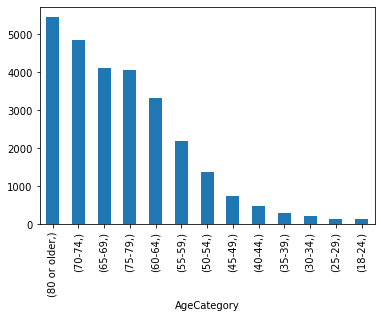

In [35]:
pd.DataFrame(df[df.HeartDisease == 'Yes']['AgeCategory']).value_counts().plot(kind = 'bar')
plt.show()

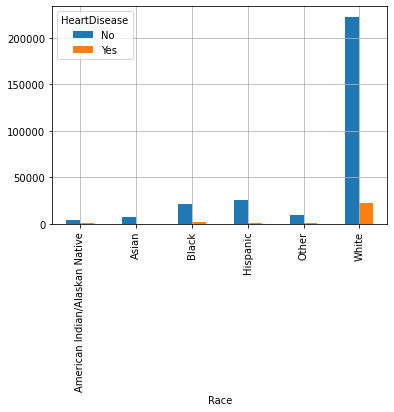

In [36]:
#HeartDisease vs Race
pd.crosstab(df.Race, df.HeartDisease).plot(kind= 'bar')
plt.grid(True)
plt.show()

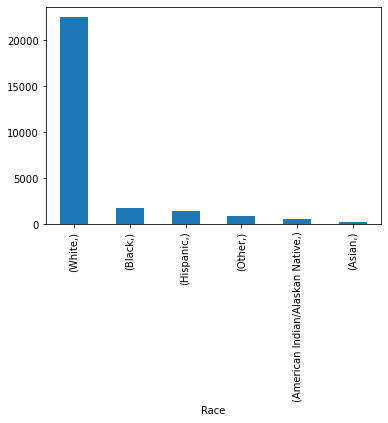

In [37]:
pd.DataFrame(df[df.HeartDisease == 'Yes']['Race']).value_counts().plot(kind = 'bar')
plt.show()

In [38]:
# heartdisease vs Diabetic

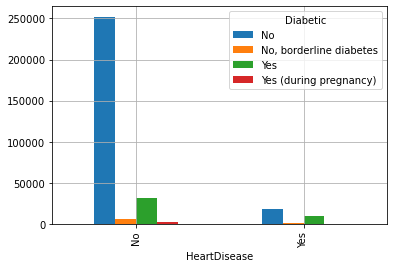

In [39]:
pd.crosstab(df.HeartDisease, df.Diabetic).plot(kind= 'bar')
plt.grid(True)
plt.show()

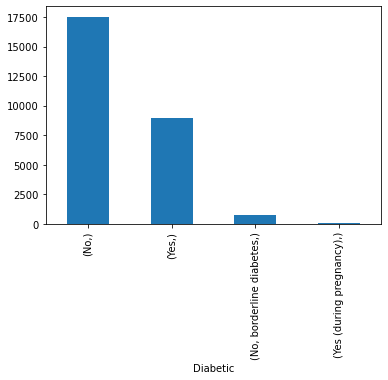

In [40]:
pd.DataFrame(df[df.HeartDisease == 'Yes']['Diabetic']).value_counts().plot(kind = 'bar')
plt.show()

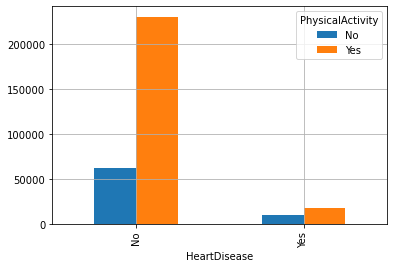

In [41]:
# Heart Disease vs PhysicalActivity
pd.crosstab(df.HeartDisease, df.PhysicalActivity).plot(kind= 'bar')
plt.grid(True)
plt.show()

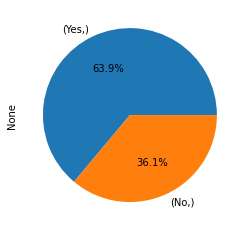

In [42]:
pd.DataFrame(df[df.HeartDisease == 'Yes']['PhysicalActivity']).value_counts().plot(kind = 'pie', autopct = '%.1f%%')
plt.show()

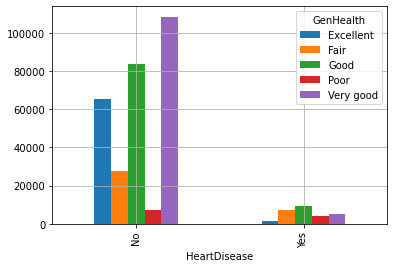

In [43]:
#HeartDisease vs GenHealth
pd.crosstab(df.HeartDisease, df.GenHealth).plot(kind= 'bar')
plt.grid(True)
plt.show()

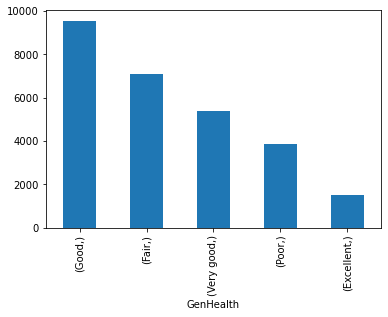

In [44]:
pd.DataFrame(df[df.HeartDisease == 'Yes']['GenHealth']).value_counts().plot(kind = 'bar')
plt.show()

<AxesSubplot:ylabel='Frequency'>

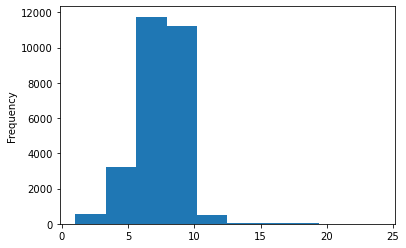

In [45]:
df[df.HeartDisease == 'Yes']['SleepTime'].plot(kind= 'hist')


In [46]:
# Health Disease vs SleepTime
df.SleepTime = df.SleepTime.astype('object')


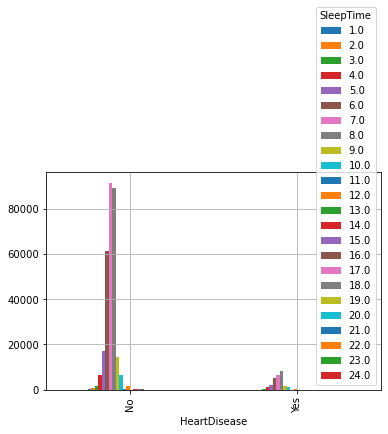

In [47]:
pd.crosstab(df.HeartDisease, df.SleepTime).plot(kind= 'bar')
plt.grid(True)
plt.show()

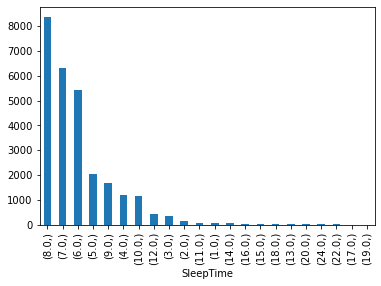

In [48]:
pd.DataFrame(df[df.HeartDisease == 'Yes']['SleepTime']).value_counts().plot(kind = 'bar')
plt.show()

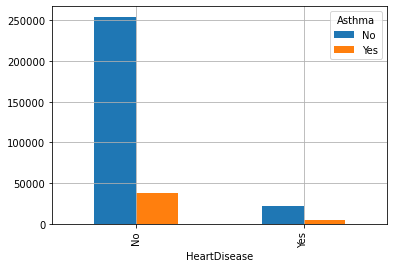

In [49]:
#Asthma vs Heart Disease
pd.crosstab(df.HeartDisease, df.Asthma).plot(kind= 'bar')
plt.grid(True)
plt.show()

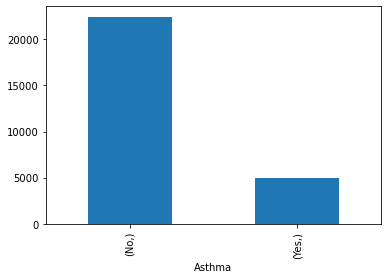

In [50]:
pd.DataFrame(df[df.HeartDisease == 'Yes']['Asthma']).value_counts().plot(kind = 'bar')
plt.show()

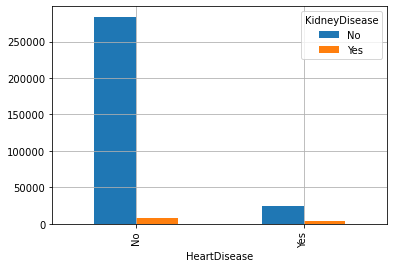

In [51]:
# heartDisease vs KidneyDisease
pd.crosstab(df.HeartDisease, df.KidneyDisease).plot(kind= 'bar')
plt.grid(True)
plt.show()

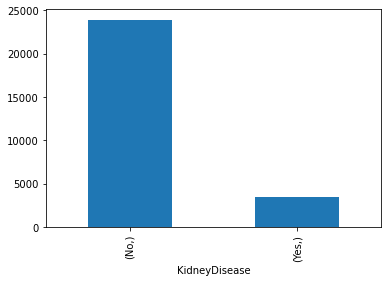

In [52]:
pd.DataFrame(df[df.HeartDisease == 'Yes']['KidneyDisease']).value_counts().plot(kind = 'bar')
plt.show()

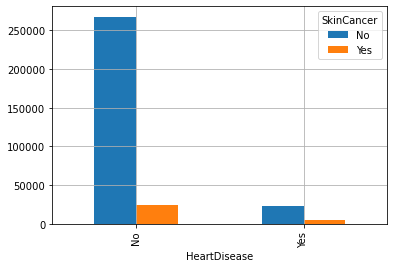

In [53]:
# heartDisease vs SkinCancer
pd.crosstab(df.HeartDisease, df.SkinCancer).plot(kind= 'bar')
plt.grid(True)
plt.show()

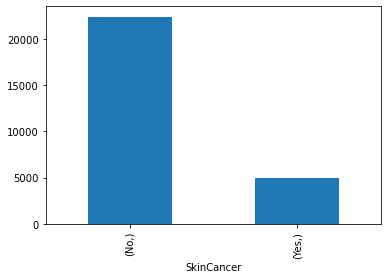

In [54]:
pd.DataFrame(df[df.HeartDisease == 'Yes']['SkinCancer']).value_counts().plot(kind = 'bar')
plt.show()

## Null Value Analysis

In [55]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## Distribution of Numerical Values 

In [56]:
numerical_columns = df.select_dtypes(include=np.number).columns
print(numerical_columns)

Index(['BMI'], dtype='object')


c:\Users\Pj158\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


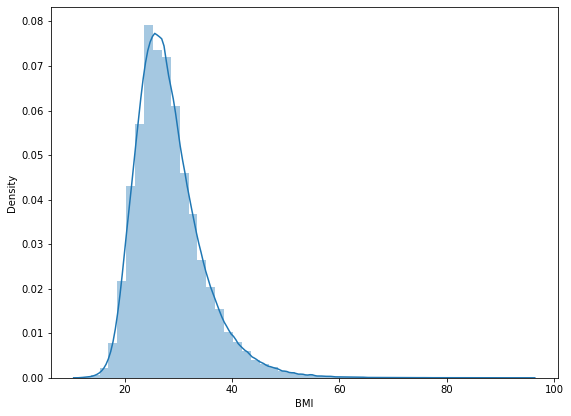

In [57]:
plt.figure(figsize=(20,15))
for i, j in zip(numerical_columns, range(4)):
    
    plt.subplot(2,2, j+1)
    sns.distplot(df[i])
plt.show()
